In [1]:
import numpy as np
import matplotlib.pyplot as plt

def error(predection, actual):
    e = 0
    for i in range(len(predection)):
        # print('predection[i]:', predection[i])
        # print('actual[i]:', actual[i])
        # print('(predection[i]-actual[i])**2:', (predection[i]-actual[i])**2)
        e = e + ((predection[i]-actual[i])**2 )

    return e/(2*len(predection))

def predictions(X, theta):
    prediction = np.dot(X, theta)
    return prediction

def gradient(X, prediction, actual):
    length, variable = X.shape
    temp = []
    for j in range(variable):
        theta_j = 0
        for i in range(length):
            theta_j = theta_j + (prediction[i] - actual[i])*X[i][j]
        
        temp.append(theta_j/length)
    return temp
    
    
    # for i in range(len(prediction)):
    #     theta_0 = theta_0 + (prediction[i] - actual[i])
    #     theta_1 = theta_1 + (prediction[i] - actual[i])*X[i]
    # return theta_0/len(prediction), theta_1/len(prediction)

def gradient_descent(X, y, learning_rate):
    m = len(y)  # Number of training examples
    n = X.shape[1]  # Number of features
    theta = np.zeros((n, 1))  # Initialize parameters with zeros
    # theta = np.zeros(n)
    pred=predictions(X,theta)
    e = 0
    previous_e = 0
    error_diff = 1
    error_at_each_step=[]
    while error_diff > 0.0001:
        # Calculate predictions
        pred = predictions(X, theta)
        previous_e = e
        # Calculate error
        e = error(pred, y)
        error_at_each_step.append(e)
        # Calculate gradient
        grad = gradient(X, pred, y)
        theta = [theta[i] - learning_rate * grad[i] for i in range(n)]
        error_diff = abs(e-previous_e)
        # print('e:', e)
    return theta, error_at_each_step

# def to_add_dummy_variable(X):

def add_bias_variable(X):
    n = X.shape[0]
    X_b = np.concatenate((np.ones((n,1)),X), axis=1)
    return X_b




########################################### Example  ################################

[array([2.69173262]), array([2.8707721]), array([2.68233393])]


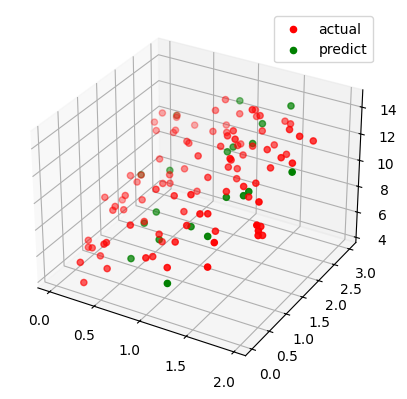

In [2]:


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
# Generate some random data
np.random.seed(0)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X = np.c_[X1, X2]
y =4 + 3 * X1 + 2*X2 + np.random.randn(100, 1)

# print('X:', X)
# print('y:', y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_b = add_bias_variable(X_train)
X_test_b = add_bias_variable(X_test)

# print('X_train_b:', X_train_b)
# Define hyperparameters
learning_rate = 0.001
# Run gradient descent
theta, error_at_each_step = gradient_descent(X_train_b, y_train, learning_rate)
print(theta)

optimized_y_test = [np.dot(X_test_b[i], theta) for i in range(X_test.shape[0])]

# Create a 3D plot

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, c='r', marker='o', label= 'actual')
ax.scatter(X_test[:,0], X_test[:,1], optimized_y_test, c='g', marker='o', label= 'predict')
plt.legend()